<table style="width: 100%;">
  <tr>
    <td style="text-align: left;"><h1 style="font-size: 30px;">Review of dataset</h1></td>
    <td style="text-align: right;"><img src="https://upload.wikimedia.org/wikipedia/commons/e/e6/Logo_Universitat_de_Barcelona.png" alt="University of Barcelona Logo" width="200" /></td>
  </tr>
</table>

Summary: <br>
We want to do a quality check for the databases gotten from "Inside Airbnb". In order to do that, the following tests will be performed: <br>


<ol>
<li>Num of reviews per listing</li>
<li>Matching reviews with listing</li>
<li>How often do kewords appear?</li>
<li>Extra</li>
<li>Summary</li>
</ol>




## Dataset overview and initialisation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import re 
import seaborn as sns
from scipy import stats

# Eliminate warnings for presentation purpuses
import warnings
warnings.filterwarnings('ignore') #ignore all warnings, very messy
#warnings.filterwarnings('default')
pd.options.mode.chained_assignment = None
from rich import print

#preatty printing
from rich import print
from tabulate import tabulate
from IPython.display import Markdown
from IPython.display import display, HTML
pd.set_option('display.max_colwidth', 20)

In [3]:
# load data
#insights = pd.read_csv(r'C:/Users/Joano/Documents/info/AIR B&B insight/listings.csv/listings.csv')
#reviews = pd.read_csv(r'C:/Users/Joano/Documents/info/AIR B&B insight/reviews.csv/reviews.csv')
#calendar = pd.read_csv(r'C:/Users/Joano/Documents/info/AIR B&B insight/calendar.csv/calendar.csv')

insights = pd.read_csv('bdd_barcelona/originals/listings.csv')
reviews = pd.read_csv('bdd_barcelona/originals/reviews.csv')
calendar = pd.read_csv('bdd_barcelona/originals/calendar.csv')

In [4]:
def print_title(text):
    formatted_text = f"<b><big>{text}</big></b>"
    display(HTML(formatted_text))
    return

In [5]:
print_title("Insights dataset")
display(insights.head())

print_title("Reviews dataset")
display(reviews.head())

print_title("Calendar dataset")
display(calendar.head())


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airb...,20230610001920,2023-06-10,city scrape,Rental unit in B...,110m2 apartment ...,Apartment in Bar...,https://a0.musca...,71615,...,4.71,4.82,4.32,HUTB-002062,t,28,28,0,0,0.29
1,23197,https://www.airb...,20230610001920,2023-06-10,city scrape,Rental unit in S...,Beautiful spacio...,Strategically lo...,https://a0.musca...,90417,...,4.99,4.61,4.63,HUTB005057,f,2,2,0,0,0.48
2,32711,https://www.airb...,20230610001920,2023-06-10,city scrape,Rental unit in B...,A lovely two bed...,What's nearby <...,https://a0.musca...,135703,...,4.85,4.86,4.52,HUTB-001722,t,3,3,0,0,0.63
3,41952,https://www.airb...,20230610001920,2023-06-10,city scrape,Rental unit in B...,Bright new apart...,NaN,https://a0.musca...,183340,...,4.49,4.70,4.33,HUTB-003549,t,5,5,0,0,0.49
4,46153,https://www.airb...,20230610001920,2023-06-10,city scrape,Rental unit in B...,Coming to visit ...,Centrally locate...,https://a0.musca...,90417,...,4.40,4.40,3.80,Exempt,f,2,2,0,0,0.03


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,18674,4808211,2013-05-27,4841196,Caron,Great location. ...
1,18674,10660311,2014-03-02,11600277,Juan Carlos,Mi mejor recomen...
2,18674,41087522,2015-08-04,35231385,Shlomi,"Big apartment, w..."
3,18674,81000756,2016-06-20,23223644,Joost,The Check in was...
4,18674,278588962,2018-06-18,4756672,Marius,Great location a...


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,18674,2023-06-10,f,$210.00,$210.00,4.0,1125.0
1,18674,2023-06-11,f,$210.00,$210.00,4.0,1125.0
2,18674,2023-06-12,f,$210.00,$210.00,4.0,1125.0
3,18674,2023-06-13,f,$210.00,$210.00,4.0,1125.0
4,18674,2023-06-14,f,$210.00,$210.00,2.0,1125.0


In [6]:
def col_table3(list_strings):
    num_columns = 5
    num_rows = len(list_strings) // num_columns + (len(list_strings) % num_columns > 0)
    table = []
    if(type(list_strings) is not list):
        list_strings = list_strings.tolist()
    for i in range(num_rows):
        row = list_strings[i::num_rows]
        row.extend([''] * (num_columns - len(row)))
        table.append(row)
    html_table = tabulate(table, headers=['', '', ''], tablefmt='html')
    display(HTML(html_table))
    return
col_table3(insights.columns)
col_table3(reviews.columns)


,,,,
id,host_response_time,latitude,minimum_maximum_nights,last_review
listing_url,host_response_rate,longitude,maximum_maximum_nights,review_scores_rating
scrape_id,host_acceptance_rate,property_type,minimum_nights_avg_ntm,review_scores_accuracy
last_scraped,host_is_superhost,room_type,maximum_nights_avg_ntm,review_scores_cleanliness
source,host_thumbnail_url,accommodates,calendar_updated,review_scores_checkin
name,host_picture_url,bathrooms,has_availability,review_scores_communication
description,host_neighbourhood,bathrooms_text,availability_30,review_scores_location
neighborhood_overview,host_listings_count,bedrooms,availability_60,review_scores_value
picture_url,host_total_listings_count,beds,availability_90,license
host_id,host_verifications,amenities,availability_365,instant_bookable


,,,,
listing_id,date,reviewer_name,,
id,reviewer_id,comments,,


## Test 1: Num of reviews per listing 
We have to decide wich amount of reviews we want to get at a minimum to consider a particular listing

In [7]:
# Plot a pline chart with a dot in the 5th element
def line_plot(x_axis, y_axis, x_axis_name, y_axis_name, title, size_x, size_y):
    plt.figure(figsize=(size_x, size_y))
    plt.plot(x_axis, y_axis)

    plt.plot(x_axis[5], y_axis[5], 'go')
    plt.title(title)
    plt.xlabel(x_axis_name)
    plt.ylabel(y_axis_name)
    plt.show()

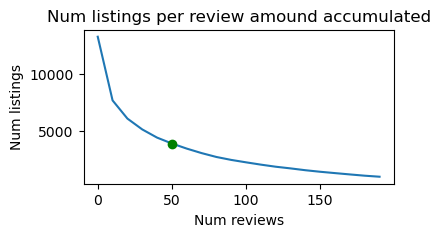

In the database there are 17230 accomodations and in total 729005 reviews, we have to set a cuttof of amound of 
reviews to consider a listing as valid.

We will take the cutoff at 100 reviews/listing since we will have 2320  listings to go through with at least 100 
reviews, wiche equates to a total of 497897.0. The description of the comment ammount per listing over 100 reviews 
is: 

count    2320.000000
mean      214.610776
std       118.677784
min       100.000000
25%       132.000000
50%       178.000000
75%       261.250000
max      1751.000000
Name: number_of_reviews, dtype: float64

In [8]:
num_listings = []
x_axis = []
i = 0

# Get the num of listings with a greater amound of reviews than X
for x in range(0, 200, 10):
    df3 = insights[insights['number_of_reviews'] > x]
    num_listings.append(len(df3.index))
    x_axis.append(x)

#fron now on, we will use this df as the usefull subset of information
filtered_insight = insights[insights['number_of_reviews'] > 99]

# Summary
line_plot(x_axis, num_listings, "Num reviews", "Num listings","Num listings per review amound accumulated", 4, 2)
result_1_1 = len(filtered_insight.index)
result_1_2 = len(filtered_insight.index)*filtered_insight['number_of_reviews'].mean()
result_1_3 = filtered_insight['number_of_reviews'].describe()
print(f"In the database there are {len(insights)} accomodations and in total {len(reviews)} reviews, we have to set a cuttof of amound of reviews to consider a listing as valid.")
print(f"We will take the cutoff at 100 reviews/listing since we will have {result_1_1}  listings to go through with at least 100 reviews, wiche equates to a total of {result_1_2}. The description of the comment ammount per listing over 100 reviews is: \n\n{result_1_3}")

## Test 2: Matching reviews with listing
We want to know how many of the reviews that are shown in the previous graph can be found in the reviews dataset

In [9]:
insight_aux = filtered_insight[['id', 'number_of_reviews']].copy()

num_id = reviews.groupby('listing_id').size().reset_index(name='count')
num_id = num_id[num_id['count'] > 99]
num_id = num_id.rename(columns={'listing_id': 'id','count': 'number_of_reviews'})

insight_aux.set_index('id', inplace=True)
num_id.set_index('id', inplace=True)
insight_aux = insight_aux.sort_values(by='id')
num_id = num_id.sort_values(by='id')

#from now on, we will use this df as the default review subset
filtered_reviews = reviews[reviews['listing_id'].isin(insight_aux.index)]

result_2_1 = len(num_id.index) == len(insight_aux.index)
result_2_2 = insight_aux.equals(num_id)
print(f"Is the number of reviews matching in the two datasets? {result_2_1}")
print(f"Do the linstings have the same reviews as shown in the dataset insight? {result_2_2}")

Is the number of reviews matching in the two datasets? True

Do the linstings have the same reviews as shown in the dataset insight? True

## Test 3: How often do kewords appear?

We want to know how relevant are the reviews to our predeterminated categories

In [10]:
#Create dataframe with key words to look into the reviews
key_words = {
    'Cleaning': ['clean', 'cleaning', 'cleanliness', 'tidy', 'neat', 'dirty', 'messy', 'unclean',
                 'limpio', 'limpieza', 'pulcritud', 'ordenado', 'aseado', 'sucio', 'desordenado', 'no limpio'],
    'Communication': ['communicate', 'communication', 'responsive', 'responsive', 'clear', 'unresponsive', 'poor', 'incommunicative',
                      'comunicar', 'comunicación', 'responsivo', 'responsivo', 'claro', 'no responsivo', 'deficiente', 'incomunicativo'],
    'Arrival': ['arrive', 'arrival', 'check-in', 'check in', 'check-in process', 'late', 'delayed', 'problems',
                'llegar', 'llegada', 'registro', 'registro', 'proceso de registro', 'tarde', 'retrasado', 'problemas'],
    'Veracity': ['truth', 'honest', 'honesty', 'accurate', 'veracious', 'dishonest', 'deceptive', 'unreliable',
                 'verdad', 'honesto', 'honestidad', 'preciso', 'veraz', 'deshonesto', 'engañoso', 'poco confiable'],
    'Location': ['location', 'neighborhood', 'proximity', 'accessibility', 'convenient', 'remote', 'inaccessible', 'far',
                 'ubicación', 'barrio', 'proximidad', 'accesibilidad', 'conveniente', 'remoto', 'inaccesible', 'lejos'],
    'Quality': ['quality', 'excellence', 'standards', 'impeccable', 'superior', 'inferior', 'subpar', 'low-quality',
                'calidad', 'excelencia', 'estándares', 'impecable', 'superior', 'inferior', 'deficiente', 'baja calidad'],
    'General': ['good', 'bad', 'excellent', 'poor', 'awesome', 'awful', 'fantastic', 'horrible', 'amazing', 'terrible', 'mediocre', 'average', 'substandard', 'unsatisfactory', 'ok', 'okay'
                'bueno', 'malo', 'excelente', 'pobre', 'increíble', 'fantástico', 'horrible', 'asombroso', 'terrible', 'promedio', 'deficiente', 'insatisfactorio', 'normal' ]
}


In [15]:
results = pd.DataFrame({'Type':[],'Hit rate':[]})
total = len(filtered_reviews)
for (columnName, word_list) in tqdm(key_words.items()):
    # Create a regular expression pattern for the word list
    pattern = '|'.join(word_list)
    # Use str.contains() to check for the presence of words from the list
    filtered_df = filtered_reviews[filtered_reviews['comments'].str.contains(pattern, case=False, na=False)]
    
    hit_rate = len(filtered_df)/total
    df2 = {'Type':columnName,'Hit rate': hit_rate}
    results.loc[len(results)] = df2
 
    filtered_reviews = filtered_reviews.copy()
    filtered_reviews[columnName] = filtered_reviews['id'].apply(lambda x: x in filtered_df['id'].values)
    
#display(results)

  0%|          | 0/7 [00:00<?, ?it/s]

The percentage of listings with at least one review with relevant information is: 1.0

The percentage of reviews that we have determined have relevant information is: 0.6662984512861094.

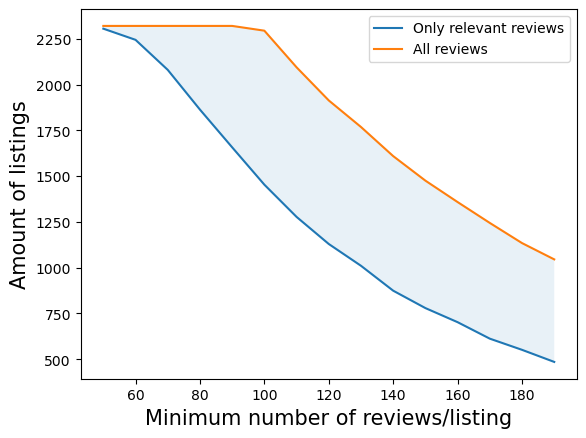

Average original num of reviews per listing: 214.61077586206898
 Average num of relevant reviews per listing: 142.9948275862069
 Average differenfe of reviews per listing: 71.61594827586208
 Average percentual loss of reviews per listing: 0.3337015487138907

In [16]:
#Now we are going to determine how many comments have relebant information overall

condition = (filtered_reviews["Cleaning"] | filtered_reviews["Communication"] | filtered_reviews["Arrival"] | filtered_reviews["Veracity"] | filtered_reviews["Location"] | filtered_reviews["Quality"] | filtered_reviews["General"] )
filtered_reviews_2 = filtered_reviews.loc[condition]
result_3_2 = len(filtered_reviews_2.index)/len(filtered_reviews.index)

filtered_insight_2 = filtered_insight[filtered_insight['id'].isin(filtered_reviews_2['listing_id'])]
result_3_1 = len(filtered_insight_2.index)/len(filtered_insight.index)

print(f"The percentage of listings with at least one review with relevant information is: {result_3_1}")
print(f"The percentage of reviews that we have determined have relevant information is: {result_3_2}.")




#now we have to recalculate the number of reviews per apartment after having retrived only the relevant ones

filtered_insight_2.set_index("id", inplace=True)
filtered_insight_2['number_of_reviews'] = filtered_reviews_2["listing_id"].value_counts()

num_listings = []
num_listings_ori = []
x_axis = []
i = 0

# Get the num of listings with a greater amound of reviews than X
for x in range(50, 200, 10):
    df3 = filtered_insight_2[filtered_insight_2['number_of_reviews'] > x]
    num_listings.append(len(df3.index))
    df3 = filtered_insight[filtered_insight['number_of_reviews'] > x]
    num_listings_ori.append(len(df3.index))
    x_axis.append(x)

# Summary
#line_plot(x_axis, num_listings, "num reviews", "num listings","num listings per review amound", 4, 2)

plt.plot(x_axis, num_listings, label = "Only relevant reviews")
plt.plot(x_axis, num_listings_ori, label = "All reviews")

mask_below = np.array(num_listings_ori) > np.array(num_listings)
plt.fill_between(x_axis, num_listings, num_listings_ori, where=mask_below, interpolate=True, alpha=0.1)
plt.legend()

plt.xlabel('Minimum number of reviews/listing', fontsize = 15)
plt.ylabel('Amount of listings',  fontsize = 15)

plt.show()

# Calculate the differences between corresponding points
new_average_num_reviews = np.mean(filtered_insight_2['number_of_reviews'])
ori_average_num_reviews = np.mean(filtered_insight['number_of_reviews'])
average_difference = ori_average_num_reviews - new_average_num_reviews
percentual_overall_loss = average_difference/ori_average_num_reviews

print(f" Average original num of reviews per listing: {ori_average_num_reviews}\n Average num of relevant reviews per listing: {new_average_num_reviews}\n Average differenfe of reviews per listing: {average_difference}\n Average percentual loss of reviews per listing: {percentual_overall_loss}\n")

In [22]:
#Calculate the percentage of relevant comments for each type in the new database
results_2 = pd.DataFrame({'Type':[],'Hit rate':[]})
total = len(filtered_reviews_2.index)
for columnName in key_words.keys():
    df2 = {'Type': columnName,'Hit rate': filtered_reviews_2[columnName].sum()/total}
    results_2.loc[len(results_2)]=df2

#display(results_2)
#display(results)

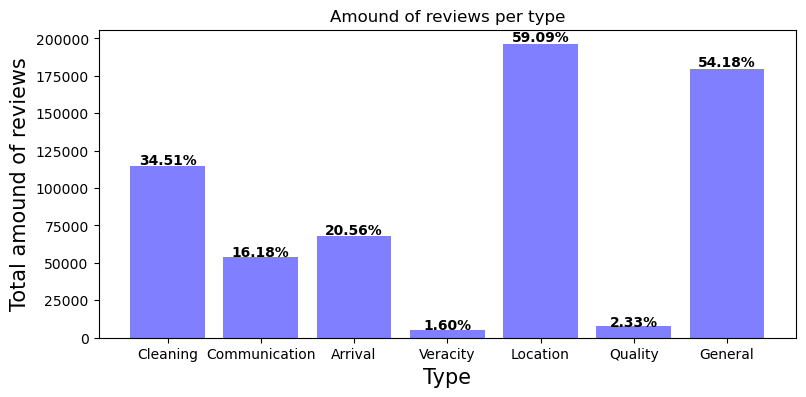

As we can see in this chart, all but two categories (Veracity and Quality) have a substantial amound of comments 
from each category to be able to extract some quind of productive information

In [25]:
#Plot the results

plt.figure(figsize=(9,4))
colors_list = ['Red','Orange', 'Blue', 'Purple','Black','Cyan','Magenta']
graph = plt.bar(results.Type,results_2["Hit rate"].multiply(total), color = 'b', alpha=0.5)
plt.title('Amound of reviews per type')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,y+height*1.01,str(format(results_2["Hit rate"][i]*100,'.2f'))+'%',ha='center',weight='bold')
    i+=1
plt.xlabel('Type', fontsize = 15)
plt.ylabel('Total amound of reviews',  fontsize = 15)
    
plt.show()

print(f"As we can see in this chart, all but two categories (Veracity and Quality) have a substantial amound of comments from each category to be able to extract some quind of productive information")

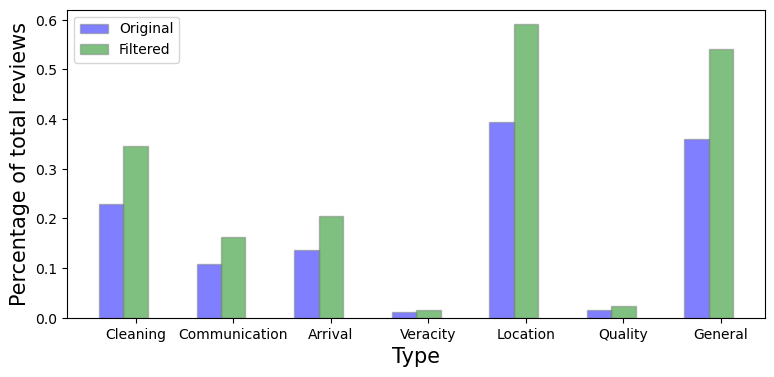

In [24]:
barWidth = 0.25
fig = plt.subplots(figsize =(9, 4))

res = results["Hit rate"]
res2 = results_2["Hit rate"]

br2 = np.arange(len(res))
br3 = [x + barWidth for x in br2]

# Make the plot

plt.bar(br2, res, color ='b', alpha=0.5 , width = barWidth,edgecolor ='grey', label ='Original')
plt.bar(br3, res2, color ='g', alpha=0.5 , width = barWidth,edgecolor ='grey', label ='Filtered')

# Adding Xticks
plt.xlabel('Type', fontsize = 15)
plt.ylabel('Percentage of total reviews',  fontsize = 15)
plt.xticks([r + barWidth for r in range(len(res))],results.Type)

plt.legend()
plt.show()



## Test 4: Review sentiment analisis

In [15]:
word_category_mapping = {
    # Very Good
    'cleanliness': 'very good',
    'neat': 'very good',
    'limpio': 'very good',
    'limpieza': 'very good',
    'pulcritud': 'very good',
    'ordenado': 'very good',
    'aseado': 'very good',
    'excelente': 'very good',
    'increíble': 'very good',
    'fantástico': 'very good',
    'asombroso': 'very good',
    'maravilloso': 'very good',

    # Good
    'clean': 'good',
    'cleaning': 'good',
    'tidy': 'good',
    'communicate': 'good',
    'communication': 'good',
    'responsive': 'good',
    'clear': 'good',
    'comunicar': 'good',
    'comunicación': 'good',
    'responsivo': 'good',
    'claro': 'good',
    'llegar': 'good',
    'llegada': 'good',
    'registro': 'good',
    'accesibilidad': 'good',
    'conveniente': 'good',
    'ubicación': 'good',
    'barrio': 'good',
    'proximidad': 'good',
    'calidad': 'good',
    'excelencia': 'good',
    'estándares': 'good',
    'preciso': 'good',
    'veraz': 'good',
    'confiable': 'good',

    # Okay
    'check-in': 'okay',
    'check in': 'okay',
    'check-in process': 'okay',
    'proceso de registro': 'okay',
    'ok': 'okay',
    'average': 'okay',
    'normal': 'okay',

    # Bad
    'dirty': 'bad',
    'messy': 'bad',
    'unclean': 'bad',
    'sucio': 'bad',
    'desordenado': 'bad',
    'dishonest': 'bad',
    'deceptive': 'bad',
    'deshonesto': 'bad',
    'engañoso': 'bad',
    'incomunicativo': 'bad',
    'poor': 'bad',
    'incommunicative': 'bad',
    'deficiente': 'bad',
    'low-quality': 'bad',
    'inferior': 'bad',
    'subpar': 'bad',
    'baja calidad': 'bad',

    # Very Bad
    'horrible': 'very bad',
    'terrible': 'very bad',
    'awful': 'very bad',
    'mediocre': 'very bad',
    'substandard': 'very bad',
    'insatisfactorio': 'very bad',
}
sentiment_index = pd.DataFrame(list(word_category_mapping.items()), columns=['Word', 'Sentiment'])

In [18]:
# Initialize an empty list to store word-based results
word_results = []

for type_name, word_list in tqdm(key_words.items()):
    for word in word_list:
        # Count the number of comments containing the current word
        word_count = filtered_reviews['comments'].str.count(word, flags=re.IGNORECASE).sum()
        
        # Append the results to the list
        word_results.append({'Word': word, 'Type': type_name, 'Count': word_count})

# Create a DataFrame from the word-based results
word_results_df = pd.DataFrame(word_results)

# Display the word-based results DataFrame
#display(word_results_df)


  0%|          | 0/7 [00:00<?, ?it/s]

In [66]:
# Make subtabkes to better display data
full_word_sentiment_table = word_results_df.merge(sentiment_index[["Word","Sentiment"]])
#display(full_word_sentiment_table)

unique_sentiments = full_word_sentiment_table.groupby('Sentiment')['Count'].sum().reset_index()
#display(unique_sentiments)

sentiment_type_count = full_word_sentiment_table.groupby(['Sentiment','Type'])['Count'].sum().reset_index()
#display(sentiment_type_count)

# Make a list for the top five words per type
grouped = full_word_sentiment_table.groupby('Type')
top_words_df = pd.DataFrame(columns=['Type', 'Word', 'Count','Sentiment'])
for name, group in grouped:
    top_5_words = group.nlargest(5, 'Count')
    top_words_df = pd.concat([top_words_df, top_5_words])
top_words_df = top_words_df.reset_index(drop=True)

#print(top_words_df.head(10))


# Make a list for the top five words per sentiment


print(top_words_df.head(10))



Type           Word     Count Sentiment
0       Cleaning          dirty    1600.0       bad
1  Communication           poor     825.0       bad
2        General           poor     825.0       bad
3       Cleaning          sucio     258.0       bad
4       Cleaning          messy      83.0       bad
5       Cleaning          clean  104498.0      good
6  Communication  communication   27924.0      good
7       Location      ubicación   15083.0      good
8  Communication     responsive   14286.0      good
9  Communication     responsive   14286.0      good

In [114]:
def top_5_table(x_value):
    
    grouped = full_word_sentiment_table.groupby(x_value)
    top_words_df = pd.DataFrame(columns=['Type', 'Word', 'Count','Sentiment'])
    for name, group in grouped:
        top_5_words = group.nlargest(5, 'Count')
        top_words_df = pd.concat([top_words_df, top_5_words])
    top_words_df = top_words_df.reset_index(drop=True)
    top_count=top_words_df["Count"].max()

    # Define row and column names
    row_names = [i for i in range(1,6,1)]
    col_names = [i for i in top_words_df[x_value].unique()] 

    # Add an exterior border to the table
    html_table = "<table style='margin: 0 auto; border-top: 1px solid #000;border-bottom: 1px solid #000;'>"

    # Add a header row for column names
    html_table += "<tr style='background-color: wite; text-align: center;  border-top: 1px solid #000;border-bottom: 1px solid #000;'>"
    html_table += "<th></th>"
    for col_name in col_names:
        html_table += f"<th style='padding: 8px; font-weight: bold;'>{col_name}</th>"
    html_table += "</tr>"

    # Loop through rows and columns to generate table cells
    for i, row_name in enumerate(row_names):
        index = int(row_name) - 1
        html_table += "<tr>"  # Start a new table row
        html_table += f"<th style='background-color: wite; padding: 8px; font-weight: bold;  '>{row_name}</th>"  # Add the row name cell with a border
        for j, col_name in enumerate(col_names):
            per = top_words_df.loc[index,"Count"]/top_count
            alpha = 0.1 + per * 0.9
            cell_bg_color = f"background-color: rgba(255, 0, 0, {alpha:.2f}); text-align: center;"
            html_table += f'<td style="{cell_bg_color}">{top_words_df.loc[index,"Word"]}</td>'
            index += 5
        html_table += "</tr>"  # End the current table row


    # Close the table tag
    html_table += "</table>"

    # Add a footer row with a top margin
    html_table += "<center><tr text-align: center;>"
    html_table += f'<td colspan="{num_cols + 1}" style="text-align: center; font-weight: bold; padding-top: 20px;">Top 5 words per {x_value}</td>'
    html_table += "</tr></center>"
    display(HTML(html_table))


In [115]:
top_5_table("Sentiment")
top_5_table("Type")

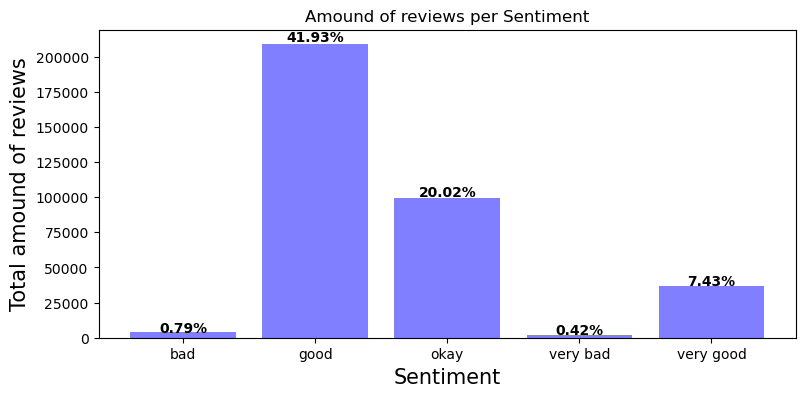

As we can see in this chart,Most of the comments fall in the category of 'good' and 'okay' wich meand ider that 
this test needs much 
improvement or that the dataset is not conducent to a rich discrimination and sentiment evaluation

In [41]:
#Plot the results

plt.figure(figsize=(9,4))
graph = plt.bar(unique_sentiments.Sentiment,unique_sentiments["Count"], color = 'b', alpha=0.5)
plt.title('Amound of reviews per Sentiment')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,y+height*1.01,str(format(unique_sentiments["Count"][i]/len(filtered_reviews.index)*100,'.2f'))+'%',ha='center',weight='bold')
    i+=1
plt.xlabel('Sentiment', fontsize = 15)
plt.ylabel('Total amound of reviews',  fontsize = 15)
    
plt.show()

print(f"""
As we can see in this chart,Most of the comments fall in the category of 'good' and 'okay' wich meand ider that this test needs much 
improvement or that the dataset is not conducent to a rich discrimination and sentiment evaluation
""")

## Test 5: Score distribution

In [32]:
def show_table(col_names,row_names,dataframe,description):
    
    # Add an exterior border to the table
    html_table = "<table style='margin: 0 auto; border-top: 1px solid #000;border-bottom: 1px solid #000;'>"

    # Add a header row for column names
    html_table += "<tr style='background-color: wite; text-align: center;  border-top: 1px solid #000;border-bottom: 1px solid #000;'>"
    html_table += "<th></th>"
    for col_name in col_names:
        html_table += f"<th style='padding: 8px; font-weight: bold;'>{col_name}</th>"
    html_table += "</tr>"
    
    # Loop through rows and columns to generate table cells
    
    for i, row_name in enumerate(row_names):
        index = 0
        #print(f"i: {i}\trow_name: {row_name}")
        html_table += "<tr>"  # Start a new table row
        html_table += f"<th style='background-color: wite; padding: 8px; font-weight: bold;  '>{row_name}</th>"  # Add the row name cell with a border
        for col_name in col_names:
            html_table += f'<td>{dataframe.loc[row_name][index]:.3f}</td>'
            index += 1
        html_table += "</tr>"  # End the current table row


    # Close the table tag
    html_table += "</table>"

    # Add a footer row with a top margin
    html_table += "<center><tr text-align: center;>"
    html_table += f'<td colspan="{num_cols + 1}" style="text-align: center; font-weight: bold; padding-top: 20px;">{description}</td>'
    html_table += "</tr></center>"
    display(HTML(html_table))

In [33]:
score_column_names = [col for col in filtered_insight.columns if 'score' in col]

dataframe =pd.DataFrame()
for i in score_column_names:
    dataframe[i] = filtered_insight[i].describe()
    
col_names = score_column_names
row_names = ["count","mean","std","min","25%","50%","75%","max"]
description = "Score description basic."
#display(dataframe)
show_table(col_names,row_names,dataframe,description)

In [34]:
df =pd.DataFrame()
for i in score_column_names:
    df[i] = filtered_insight[i]
#display(dataframe)

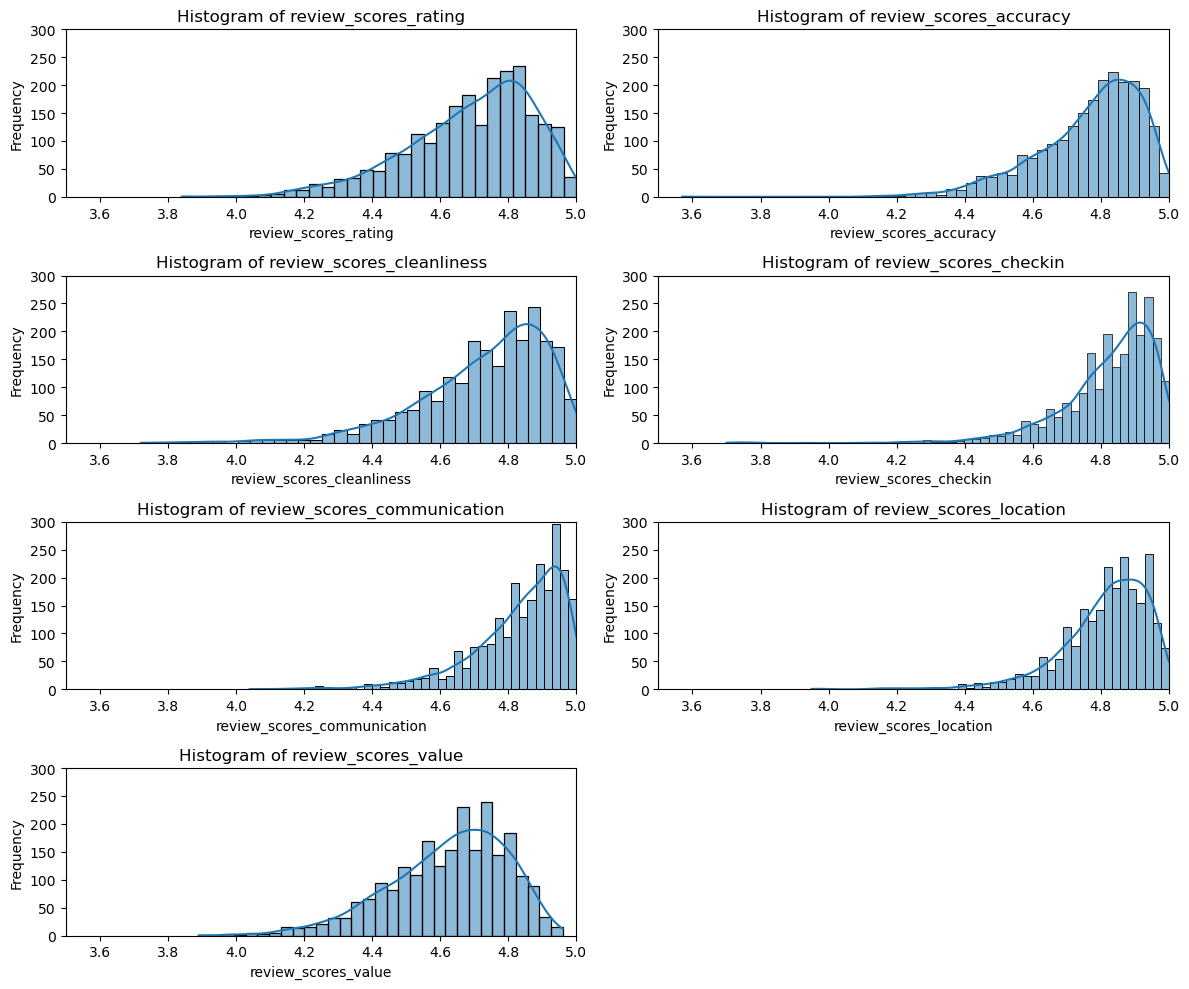

In [35]:
# Calculate the number of rows and columns needed for subplots
num_cols = 2
num_rows = (len(df.columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Flatten the axes array
axes = axes.flatten()

# Set the fixed range for the x-axis
x_range = (3.5, 5)
y_range = (0, 300)

# Plot histograms for each column
for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(x_range)  # Set the x-axis range
    axes[i].set_ylim(y_range)  # Set the x-axis range

# Hide any empty subplots
for i in range(len(df.columns), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



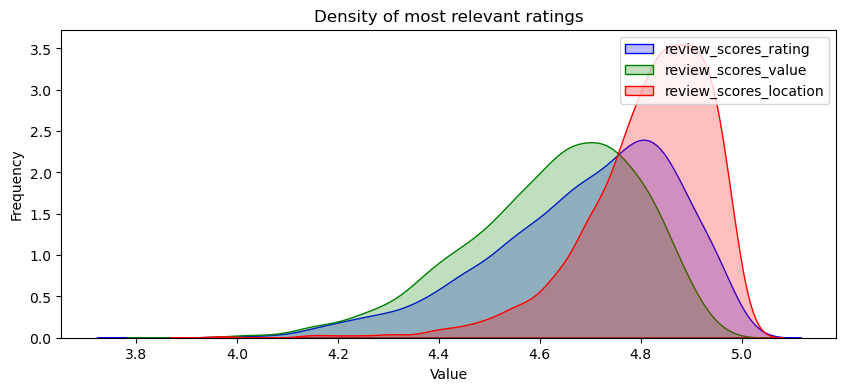

In [44]:
# Show supperposed histograms one on top of the other

def superposed_histograms():


    # Create a single plot
    plt.figure(figsize=(10, 4))

    sns.kdeplot(df[df.columns[0]], fill=True, color='blue', label=df.columns[0])
    sns.kdeplot(df[df.columns[6]], fill=True, color='green', label=df.columns[6])
    sns.kdeplot(df[df.columns[5]], fill=True, color='red',label=df.columns[5])

    # Set plot title and labels
    plt.title('Density of most relevant ratings')
    plt.xlabel('Value')
    plt.ylabel('Frequency')



    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()

    
superposed_histograms()

In [37]:
# Normalizate values

df_normalised = pd.DataFrame()
for i, col in enumerate(df.columns):
    mean = df[col].mean()
    std_dev = df[col].std()
    df_normalised[col] = (df[col] - mean) / std_dev
    
# Show detail table of normalized data
    
score_column_names = [col for col in df_normalised.columns if 'score' in col]

dataframe =pd.DataFrame()
for i in score_column_names:
    dataframe[i] = df_normalised[i].describe()
    
col_names = score_column_names
row_names = ["count","mean","std","min","25%","50%","75%","max"]
description = "Score description basic."
#display(dataframe)
#show_table(col_names,row_names,dataframe,description)

In [38]:
def score_plots(data, title):
    html_table = "<table style='margin: 0 auto; border-top: 1px solid #000;border-bottom: 1px solid #000;'>"
    # Create the figure and subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    range = (3, 5)
    # Scatter Plot on a Line
    axes[0, 0].scatter(data, np.zeros(len(data)), marker='o', color='blue', label='Random Values')
    axes[0, 0].set_xlabel('Points on the Line')
    axes[0, 0].set_ylabel('Random Values')
    axes[0, 0].set_title('Scatter Plot on a Line')
    #axes[0, 0].set_xlim(range)

    # Density Plot
    sns.kdeplot(data, fill=True, color='blue', ax=axes[0, 1])
    axes[0, 1].set_xlabel('Value')
    axes[0, 1].set_ylabel('Density')
    axes[0, 1].set_title('Density Plot')
    #axes[0, 1].set_xlim(range)

    # Probability Plot
    stats.probplot(data, dist='norm', plot=axes[1, 1])
    axes[1, 1].set_xlabel('Theoretical Quantiles')
    axes[1, 1].set_ylabel('Observed Quantiles')
    axes[1, 1].set_title('Probability Plot')
    #axes[1, 1].set_xlim(range)

    # Box Plot
    axes[1, 0].boxplot(data, vert=False)
    axes[1, 0].set_xlabel('Values')
    axes[1, 0].set_title('Box Plot')
    #axes[1, 0].set_xlim(range)

    # Adjust the arrangement of subplots
    fig.suptitle(f'{title}', fontsize=16)
    plt.tight_layout()
    
    # Display the figure with all the subplots
    plt.show()
    #df = pd.DataFrame({'Random Values': data})
    #display(data.describe())


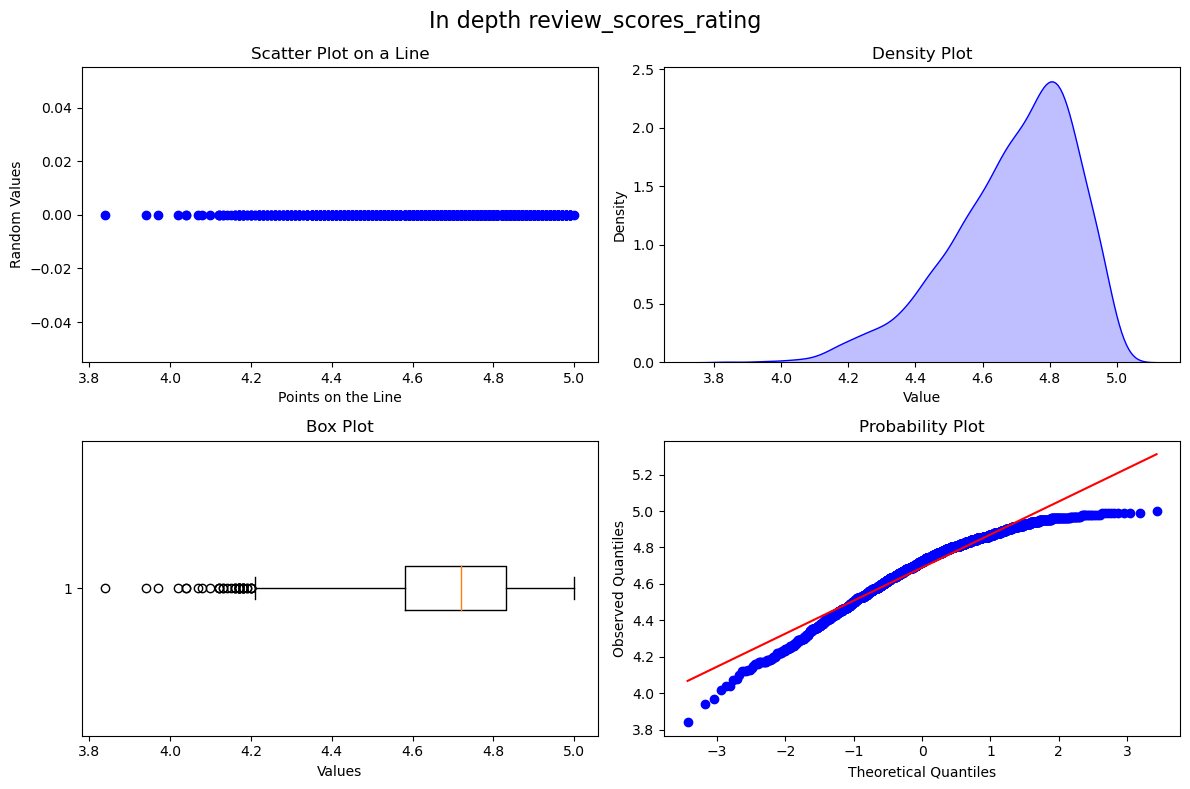

In [40]:
i = 0
score_plots(df[df.columns[i]],f"In depth {df.columns[i]}")

## Test 6: Aditional tests

In [136]:
# Calculate the average leanght of reviews
def count_words(text):
    res = 0
    if(isinstance(text, str)):  # Check if the value is a string
        words = text.split()
        res = len(words)
    return res

# Apply the function to create the 'word_count' column
filtered_reviews = filtered_reviews.copy()
filtered_reviews['word_count'] = filtered_reviews['comments'].apply(count_words)

In [137]:
leangth = filtered_reviews['word_count'].value_counts()
# Create a new series for accumulation
accumulated_series = pd.Series(0, index=range(0, max(leangth.index) + 1, 10))

# Iterate through the original series and accumulate values
accumulation = 0
for index, value in leangth.items():
    accumulated_series.loc[index // 10 * 10] += value
    accumulation += value
accumulated_series = accumulated_series

accumulated_series_200 = accumulated_series.drop(labels = [*range(100, 1009, 10)]) 
accumulated_series_400 = accumulated_series.drop(labels = [*range(0, 200, 10)])
accumulated_series_500 = accumulated_series.drop(labels = [*range(0, 400, 10)]) 


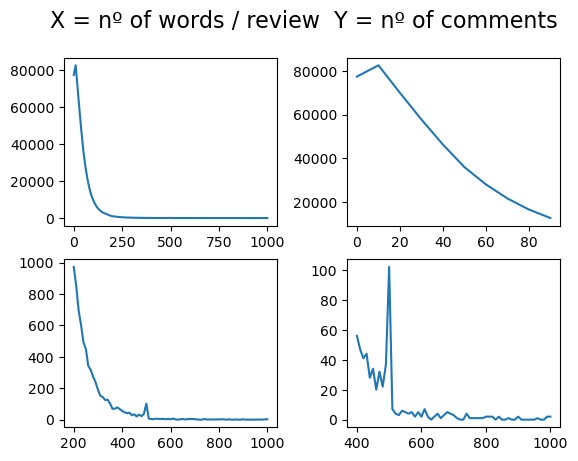

The statistics description  of the leanght of every review is: 
count    497897.000000
mean         45.634593
std          46.826195
min           0.000000
25%          15.000000
50%          33.000000
75%          61.000000
max        1000.000000
Name: word_count, dtype: float64

In [138]:
#plot
figure, axis = plt.subplots(2, 2)
figure.subplots_adjust(wspace=0.33, hspace=0.2)  # Adjust spacing between subplots

  
# For Sine Function
axis[0, 0].plot(accumulated_series)
# For Cosine Function
axis[0, 1].plot(accumulated_series_200)
# For Tangent Function
axis[1, 0].plot(accumulated_series_400)
# For Tanh Function
axis[1, 1].plot(accumulated_series_500)

figure.suptitle('X = nº of words / review  Y = nº of comments', fontsize=16)
# Combine all the operations and display
plt.show()

result_4 = filtered_reviews['word_count'].describe()

print(f"The statistics description  of the leanght of every review is: \n{result_4}")

----------------

In [19]:
#Save the progress in a csv

filtered_reviews.to_csv("bdd_barcelona/processed/Test-1/processed_reviews.csv")
filtered_reviews_2.to_csv("bdd_barcelona/processed/Test-1/filtered_reviews_2.csv") #only has reviews with relevant info and of listings with more than 100 reviews
filtered_insight.to_csv("bdd_barcelona/processed/Test-1/processed_listings.csv")
filtered_insight_2.to_csv("bdd_barcelona/processed/Test-1/filtered_insight_2.csv") #only has reviews with relevant info and of listings with more than 100 reviews

In [ ]:
#recover progress
filtered_reviews = pd.read_csv('bdd_barcelona/processed/Test-1/processed_reviews.csv')
filtered_insight = pd.read_csv('bdd_barcelona/processed/Test-1/processed_listings.csv')

## Summary

In [42]:
st = f'TEST 1-\n We will take the cutoff at 100 reviews/listing since we will have {result_1_1}  listings to go through with at least 100 reviews, wiche equates to a total of {result_1_2}. The description of the comment ammount per listing over 100 reviews is: \n\n{result_1_3}'
print(st)
st = f'TEST 2-\n Does he number of listings with at least 100 reviews matches the two datasets? {result_2_1}\n Do the linstings have the same reviews as shown in the dataset insight? {result_2_2}'
print(st)
st = f'TEST 3-\n The percentage of listings with at least one review with relevant information is: {result_3_1} \n The percentage of reviews that we have determined have relevant information is: {result_3_2}. n\ Average original num of reviews per listing: {ori_average_num_reviews}\n Average num of relevant reviews per listing: {new_average_num_reviews}\n Average differenfe of reviews per listing: {average_difference}\n Average percentual loss of reviews per listing: {percentual_overall_loss}'
print(st)
st=f"TEST 3-\n The statistics description  of the leanght of every review is: \n{result_4}"
print(st)

TEST 1-
 We will take the cutoff at 100 reviews/listing since we will have 2320  listings to go through with at least 100 
reviews, wiche equates to a total of 497897.0. The description of the comment ammount per listing over 100 reviews 
is: 

count    2320.000000
mean      214.610776
std       118.677784
min       100.000000
25%       132.000000
50%       178.000000
75%       261.250000
max      1751.000000
Name: number_of_reviews, dtype: float64

TEST 2-
 Does he number of listings with at least 100 reviews matches the two datasets? True
 Do the linstings have the same reviews as shown in the dataset insight? True

TEST 3-
 The percentage of listings with at least one review with relevant information is: 1.0 
 The percentage of reviews that we have determined have relevant information is: 0.6662984512861094. n\ Average 
original num of reviews per listing: 214.61077586206898
 Average num of relevant reviews per listing: 142.9948275862069
 Average differenfe of reviews per listing: 71.61594827586208
 Average percentual loss of reviews per listing: 0.3337015487138907

TEST 3-
 The statistics description  of the leanght of every review is: 
count    497897.000000
mean         45.634593
std          46.826195
min           0.000000
25%          15.000000
50%          33.000000
75%          61.000000
max        1000.000000
Name: word_count, dtype: float64

## 
<table style="width: 100%;">
  <tr>
      <td style="text-align: left;"><td>
    <td style="text-align: right;"><img src="https://upload.wikimedia.org/wikipedia/commons/e/e6/Logo_Universitat_de_Barcelona.png" alt="University of Barcelona Logo" width="200" /></td>
  </tr>
</table>